<a href="https://colab.research.google.com/github/Samplergithub769/mtu-xsens-imu-Sensor/blob/main/mtu_xsens_imu_Sensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



**Load Datasets**

In [2]:
df_25hz = pd.read_csv("/content/25hz.csv", skiprows=12)
df_50hz = pd.read_csv("/content/50hz.csv", skiprows=12)
df_100hz = pd.read_csv("/content/100hz.csv", skiprows=12)
df_noise_25hz = pd.read_csv("/content/Noise_25HZ.csv", skiprows=12)
df_noise_50hz = pd.read_csv("/content/Noise_50hz.csv", skiprows=12)
df_noise_100hz = pd.read_csv("/content/Noise_100hz.csv", skiprows=12)


**Display the first few rows and information for each DataFrame**

In [3]:
print("25hz.csv:")
print(df_25hz.head())

print("\n50hz.csv:")
print(df_50hz.head())

print("\n100hz.csv:")
print(df_100hz.head())

print("\nNoise_25HZ.csv:")
print(df_noise_25hz.head())

print("\nNoise_50hz.csv:")
print(df_noise_50hz.head())

print("\nNoise_100hz.csv:")
print(df_noise_100hz.head())

25hz.csv:
   PacketCounter  SampleTimeFine  Acc_X  Acc_Y  Acc_Z   AccHR_X   AccHR_Y  \
0          57364        38214066    0.0    0.0    0.0 -0.004889  0.327786   
1          57366        38214106    0.0    0.0    0.0 -0.043509  0.356337   
2          57368        38214145    0.0    0.0    0.0 -0.029078  0.342039   
3          57369        38214165    0.0    0.0    0.0 -0.000167  0.342172   
4          57371        38214205    0.0    0.0    0.0  0.019263  0.313533   

    AccHR_Z  Mag_X  Mag_Y  Mag_Z  Roll  Pitch  Yaw  Temperature  
0  9.762954    0.0    0.0    0.0   0.0    0.0  0.0          0.0  
1  9.739222    0.0    0.0    0.0   0.0    0.0  0.0          0.0  
2  9.739135    0.0    0.0    0.0   0.0    0.0  0.0          0.0  
3  9.762895    0.0    0.0    0.0   0.0    0.0  0.0          0.0  
4  9.781975    0.0    0.0    0.0   0.0    0.0  0.0          0.0  

50hz.csv:
   PacketCounter  SampleTimeFine     Acc_X     Acc_Y     Acc_Z   AccHR_X  \
0          36606         7038992 -0.101958  

In [4]:
print("Info for df_25hz:")
df_25hz.info()
print("\nMissing values in df_25hz:")
print(df_25hz.isnull().sum())

print("\nInfo for df_50hz:")
df_50hz.info()
print("\nMissing values in df_50hz:")
print(df_50hz.isnull().sum())

print("\nInfo for df_100hz:")
df_100hz.info()
print("\nMissing values in df_100hz:")
print(df_100hz.isnull().sum())

print("\nInfo for df_noise_25hz:")
df_noise_25hz.info()
print("\nMissing values in df_noise_25hz:")
print(df_noise_25hz.isnull().sum())

print("\nInfo for df_noise_50hz:")
df_noise_50hz.info()
print("\nMissing values in df_noise_50hz:")
print(df_noise_50hz.isnull().sum())

print("\nInfo for df_noise_100hz:")
df_noise_100hz.info()
print("\nMissing values in df_noise_100hz:")
print(df_noise_100hz.isnull().sum())

Info for df_25hz:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530000 entries, 0 to 529999
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PacketCounter   530000 non-null  int64  
 1   SampleTimeFine  530000 non-null  int64  
 2   Acc_X           530000 non-null  float64
 3   Acc_Y           530000 non-null  float64
 4   Acc_Z           530000 non-null  float64
 5   AccHR_X         530000 non-null  float64
 6   AccHR_Y         530000 non-null  float64
 7   AccHR_Z         530000 non-null  float64
 8   Mag_X           530000 non-null  float64
 9   Mag_Y           530000 non-null  float64
 10  Mag_Z           530000 non-null  float64
 11  Roll            530000 non-null  float64
 12  Pitch           530000 non-null  float64
 13  Yaw             530000 non-null  float64
 14  Temperature     530000 non-null  float64
dtypes: float64(13), int64(2)
memory usage: 60.7 MB

Missing values in df_25hz:
PacketCou

**Create Subplots for 25Hz data**

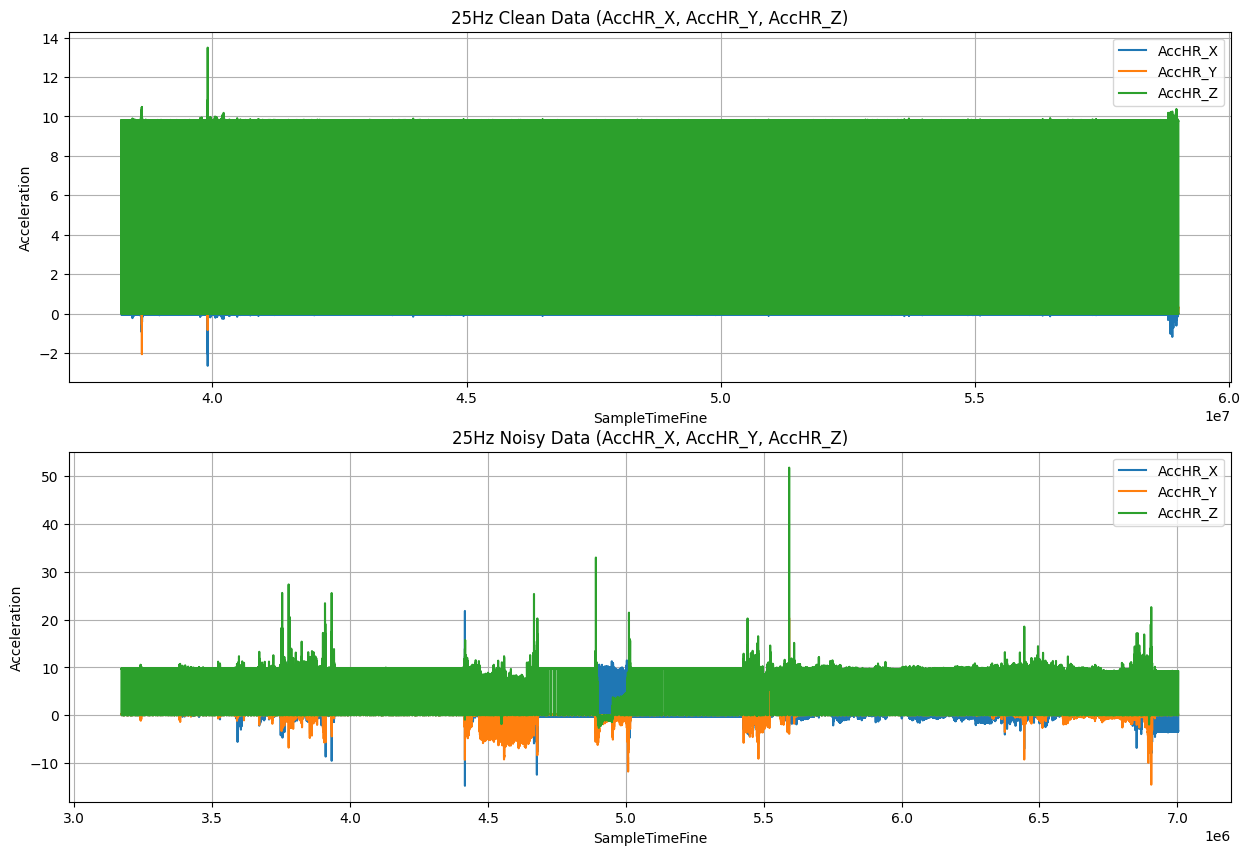

In [5]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(df_25hz['SampleTimeFine'], df_25hz['AccHR_X'], label='AccHR_X')
plt.plot(df_25hz['SampleTimeFine'], df_25hz['AccHR_Y'], label='AccHR_Y')
plt.plot(df_25hz['SampleTimeFine'], df_25hz['AccHR_Z'], label='AccHR_Z')
plt.title('25Hz Clean Data (AccHR_X, AccHR_Y, AccHR_Z)')
plt.xlabel('SampleTimeFine')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(True)


plt.subplot(2, 1, 2)
plt.plot(df_noise_25hz['SampleTimeFine'], df_noise_25hz['AccHR_X'], label='AccHR_X')
plt.plot(df_noise_25hz['SampleTimeFine'], df_noise_25hz['AccHR_Y'], label='AccHR_Y')
plt.plot(df_noise_25hz['SampleTimeFine'], df_noise_25hz['AccHR_Z'], label='AccHR_Z')
plt.title('25Hz Noisy Data (AccHR_X, AccHR_Y, AccHR_Z)')
plt.xlabel('SampleTimeFine')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(True)



**Create subplots for 50Hz data**

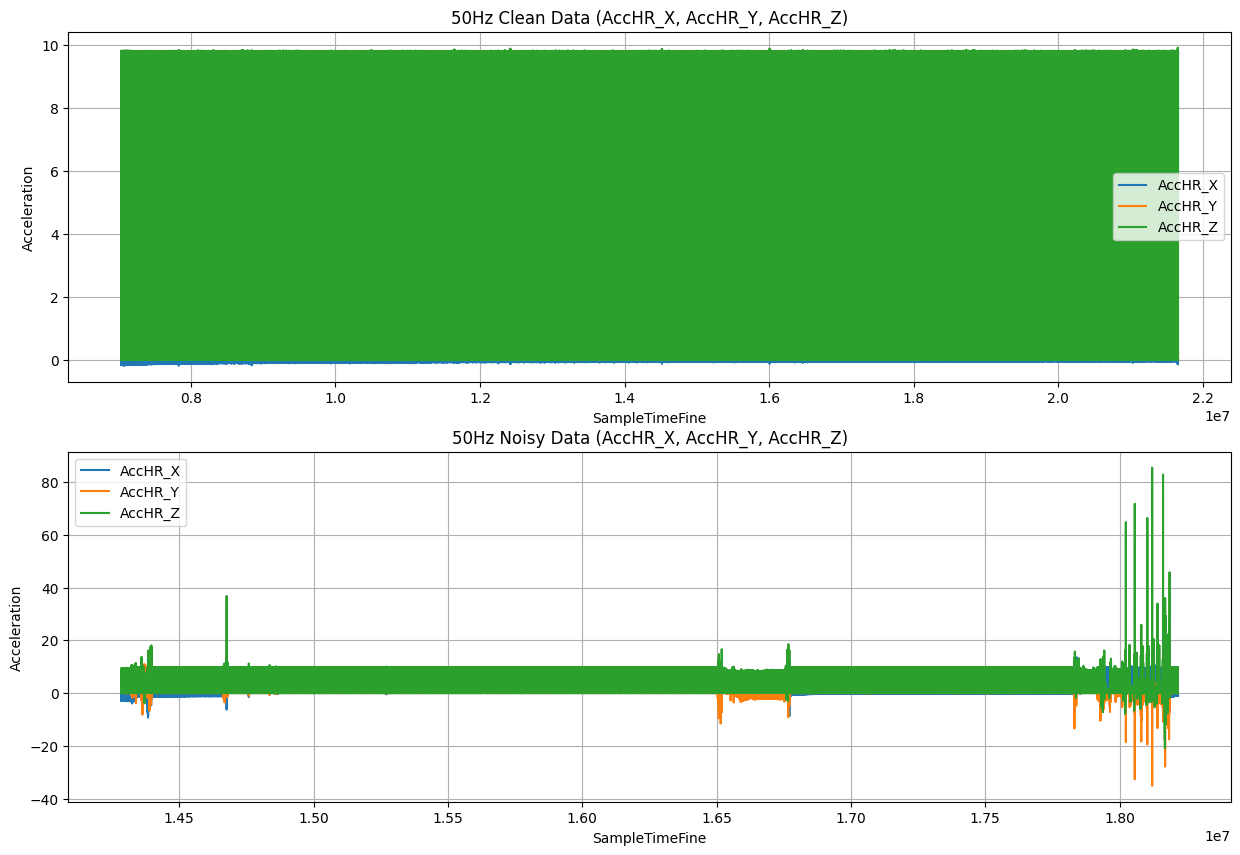

In [6]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(df_50hz['SampleTimeFine'], df_50hz['AccHR_X'], label='AccHR_X')
plt.plot(df_50hz['SampleTimeFine'], df_50hz['AccHR_Y'], label='AccHR_Y')
plt.plot(df_50hz['SampleTimeFine'], df_50hz['AccHR_Z'], label='AccHR_Z')
plt.title('50Hz Clean Data (AccHR_X, AccHR_Y, AccHR_Z)')
plt.xlabel('SampleTimeFine')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(df_noise_50hz['SampleTimeFine'], df_noise_50hz['AccHR_X'], label='AccHR_X')
plt.plot(df_noise_50hz['SampleTimeFine'], df_noise_50hz['AccHR_Y'], label='AccHR_Y')
plt.plot(df_noise_50hz['SampleTimeFine'], df_noise_50hz['AccHR_Z'], label='AccHR_Z')
plt.title('50Hz Noisy Data (AccHR_X, AccHR_Y, AccHR_Z)')
plt.xlabel('SampleTimeFine')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(True)


**Create Subplots for 100Hz data**

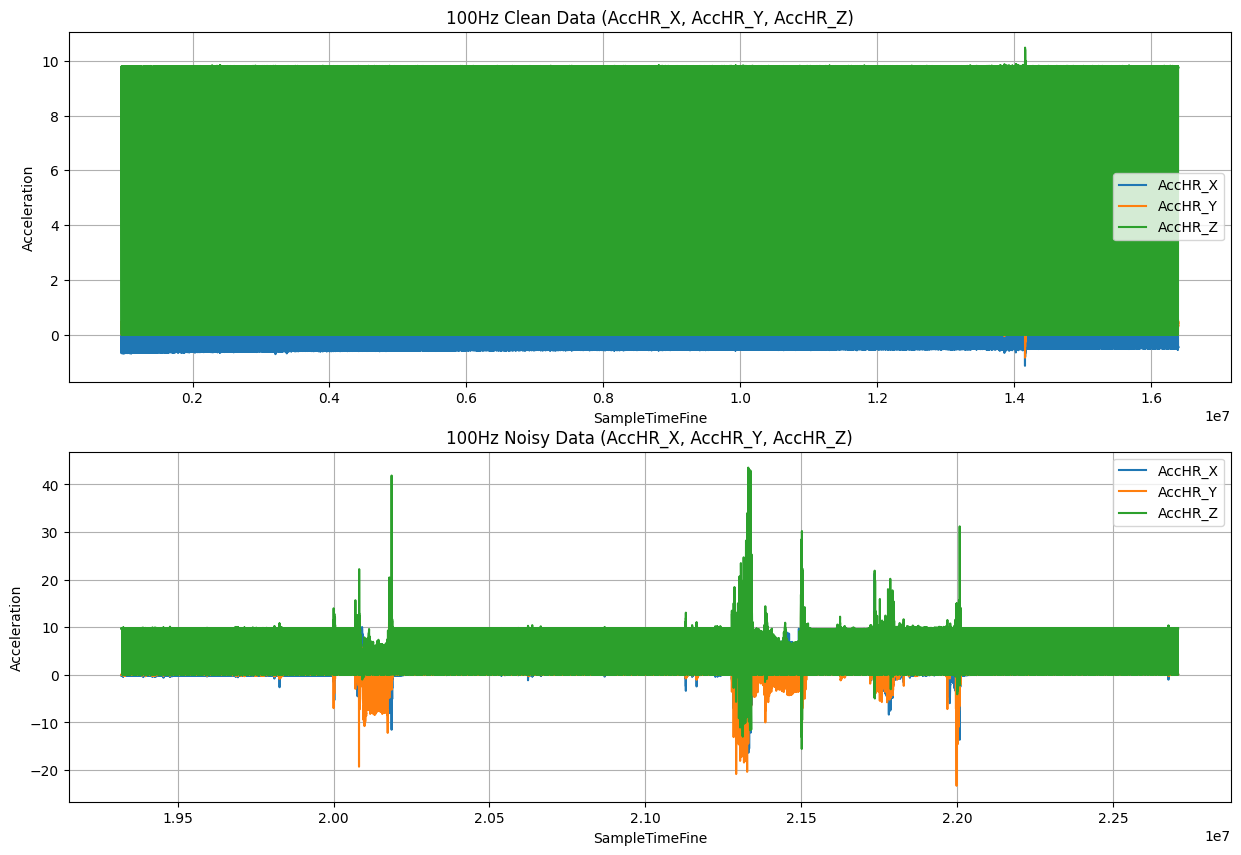

In [7]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(df_100hz['SampleTimeFine'], df_100hz['AccHR_X'], label='AccHR_X')
plt.plot(df_100hz['SampleTimeFine'], df_100hz['AccHR_Y'], label='AccHR_Y')
plt.plot(df_100hz['SampleTimeFine'], df_100hz['AccHR_Z'], label='AccHR_Z')
plt.title('100Hz Clean Data (AccHR_X, AccHR_Y, AccHR_Z)')
plt.xlabel('SampleTimeFine')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(df_noise_100hz['SampleTimeFine'], df_noise_100hz['AccHR_X'], label='AccHR_X')
plt.plot(df_noise_100hz['SampleTimeFine'], df_noise_100hz['AccHR_Y'], label='AccHR_Y')
plt.plot(df_noise_100hz['SampleTimeFine'], df_noise_100hz['AccHR_Z'], label='AccHR_Z')
plt.title('100Hz Noisy Data (AccHR_X, AccHR_Y, AccHR_Z)')
plt.xlabel('SampleTimeFine')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(True)


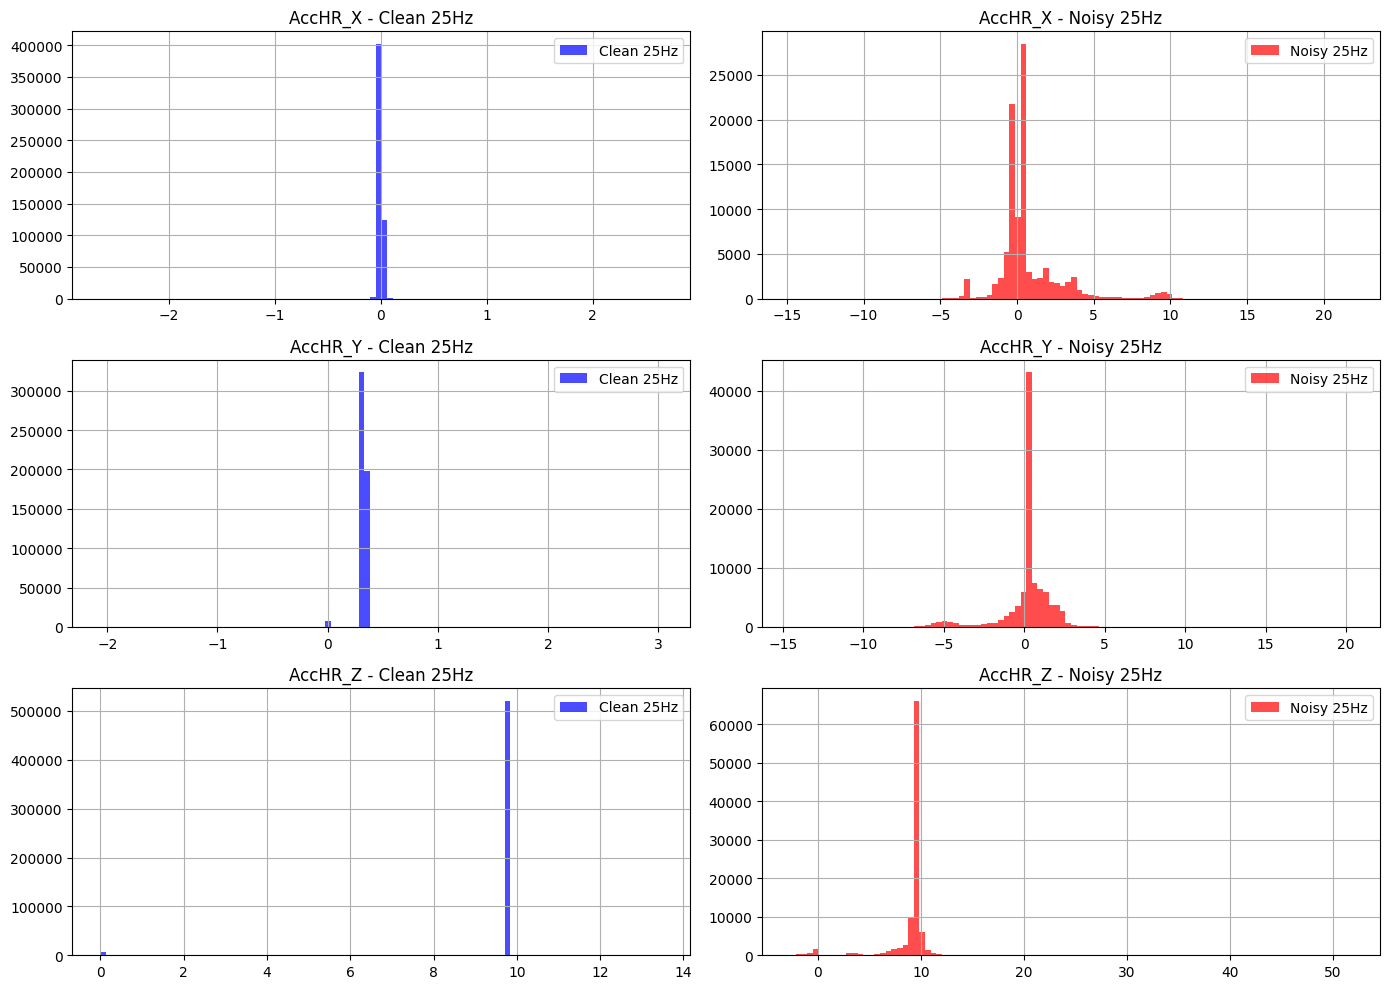

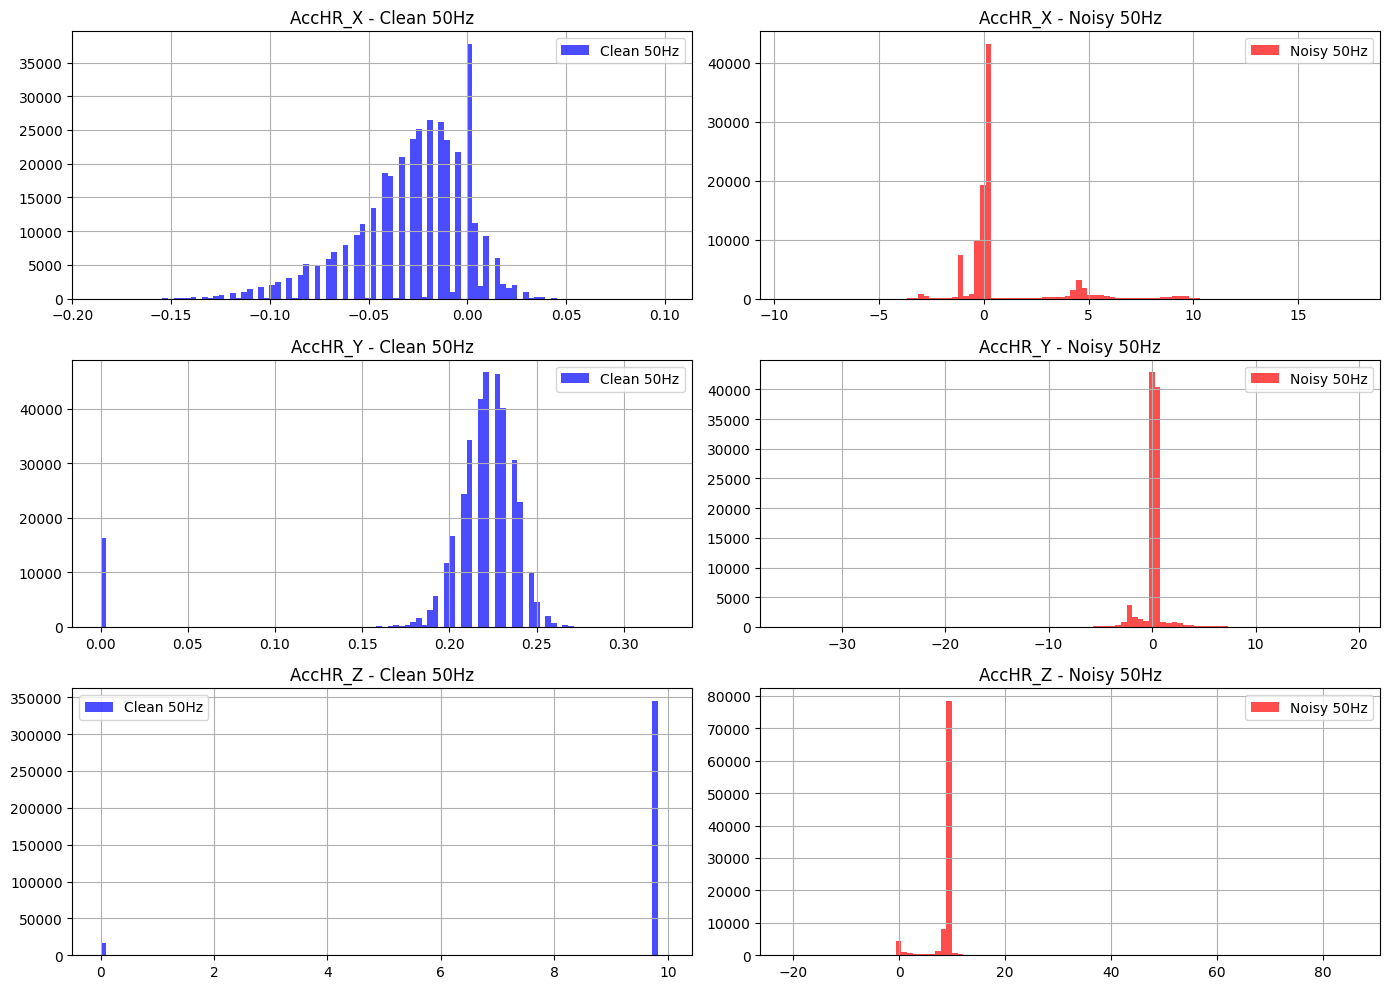

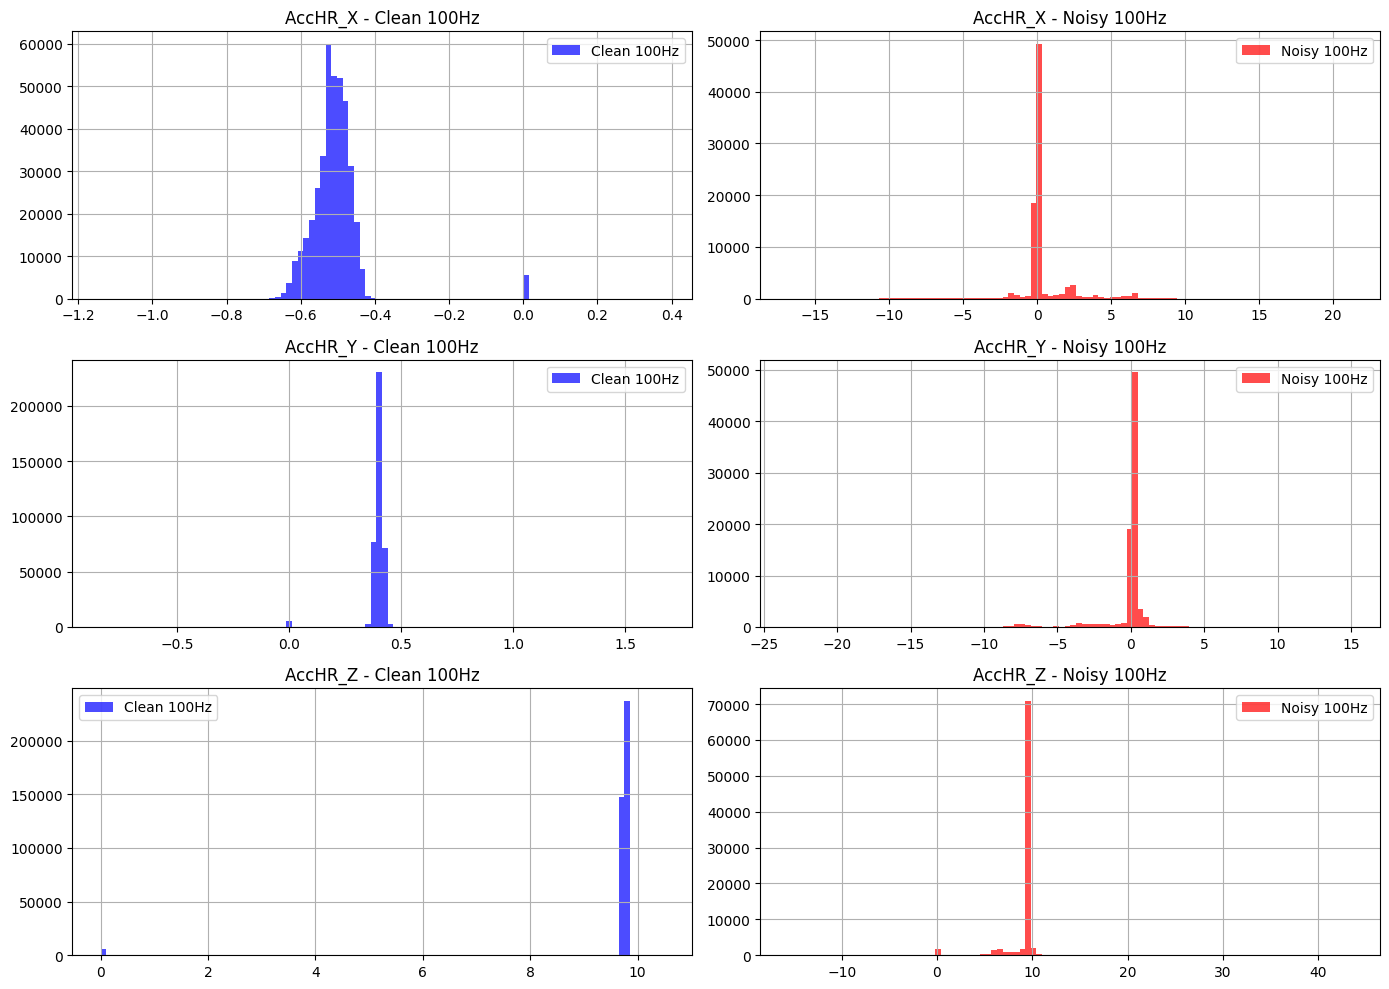

In [10]:
#Define the columns for analysis
acc_cols = ['AccHR_X', 'AccHR_Y', 'AccHR_Z']

# Function to plot histograms side by side
def plot_histograms(clean_df, noisy_df, label):
    plt.figure(figsize=(14, 10))
    for i, col in enumerate(acc_cols):
        plt.subplot(3, 2, 2*i + 1)
        plt.hist(clean_df[col], bins=100, alpha=0.7, color='blue', label=f'Clean {label}')
        plt.title(f'{col} - Clean {label}')
        plt.grid(True)
        plt.legend()

        plt.subplot(3, 2, 2*i + 2)
        plt.hist(noisy_df[col], bins=100, alpha=0.7, color='red', label=f'Noisy {label}')
        plt.title(f'{col} - Noisy {label}')
        plt.grid(True)
        plt.legend()

    plt.tight_layout()
    plt.show()

# Use the function for each frequency
plot_histograms(df_25hz, df_noise_25hz, "25Hz")
plot_histograms(df_50hz, df_noise_50hz, "50Hz")
plot_histograms(df_100hz, df_noise_100hz, "100Hz")




<ipython-input-11-2114410479>:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_25hz['Clean_AccHR_X'].dropna(), data_25hz['Noisy_AccHR_X'].dropna()], labels=['Clean 25Hz', 'Noisy 25Hz'])
<ipython-input-11-2114410479>:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_25hz['Clean_AccHR_Y'].dropna(), data_25hz['Noisy_AccHR_Y'].dropna()], labels=['Clean 25Hz', 'Noisy 25Hz'])
<ipython-input-11-2114410479>:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_25hz['Clean_AccHR_Z'].dropna(), data_25hz['Noisy_AccHR_Z'].dropna()], labels=['Clean 25Hz', 'Noisy 25Hz'])
<ipython-i

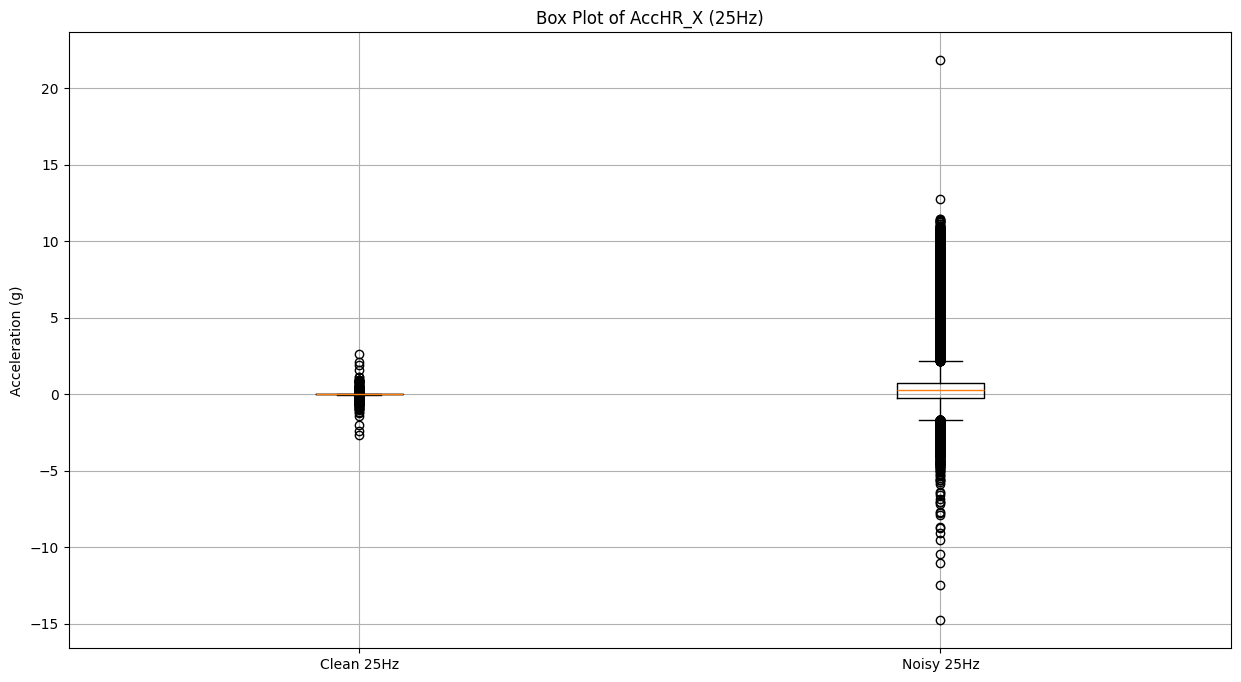

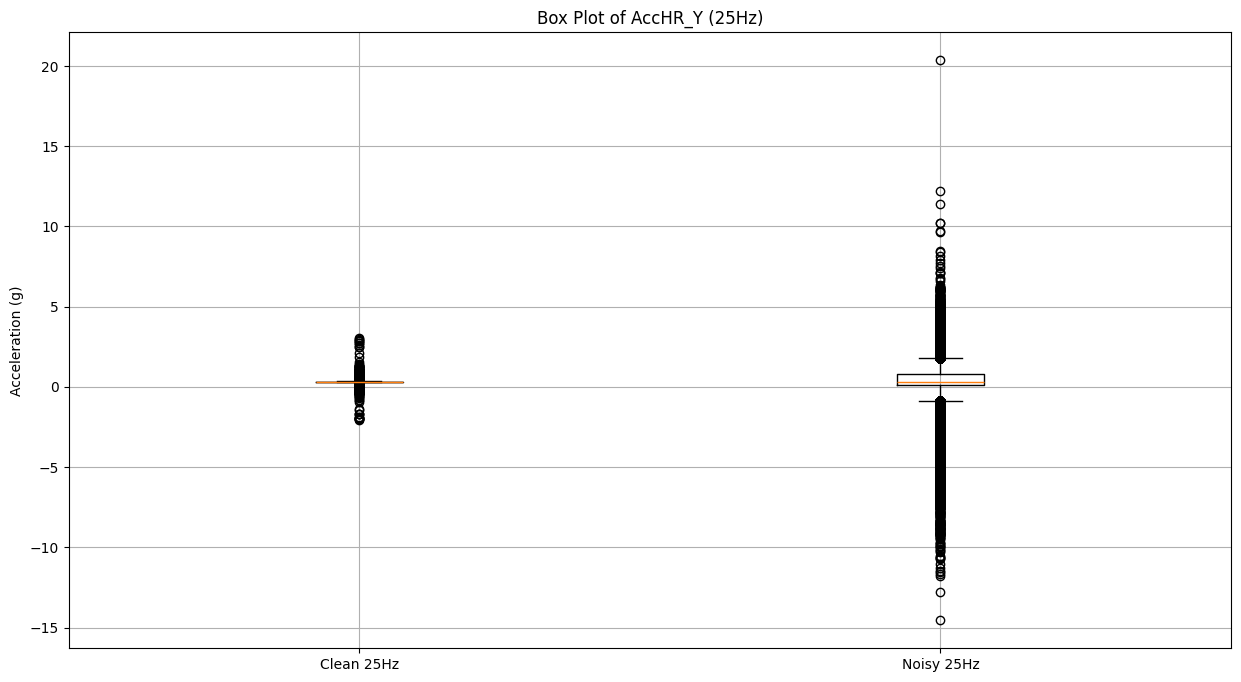

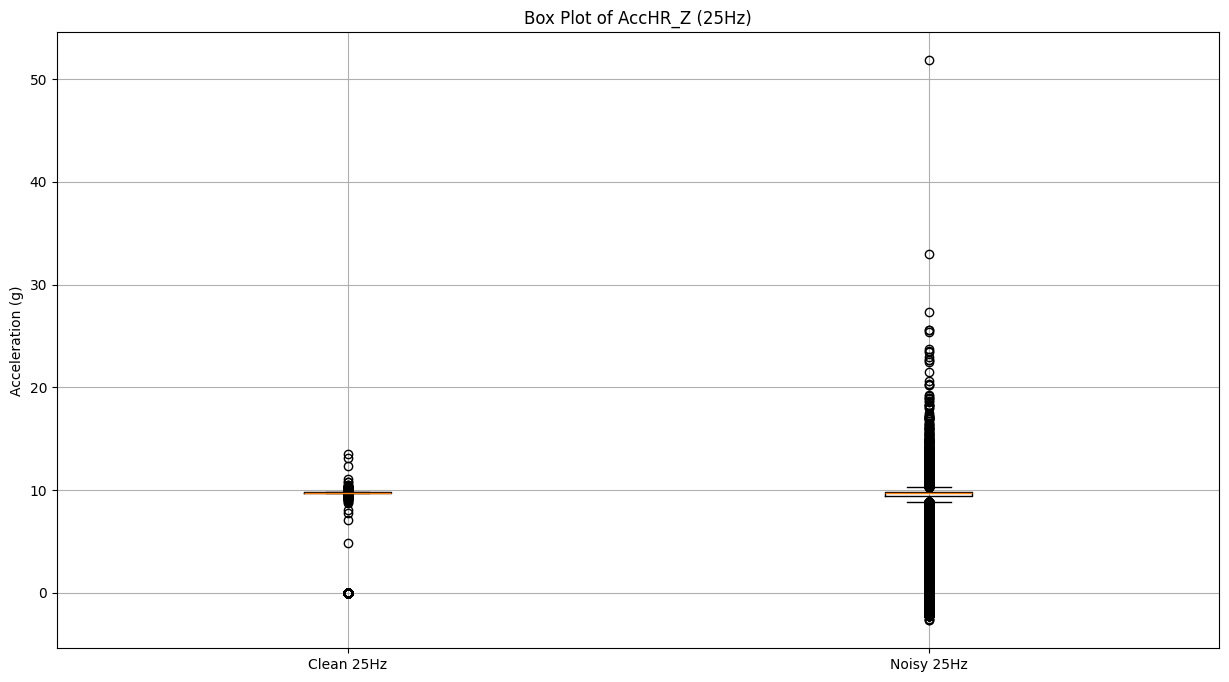

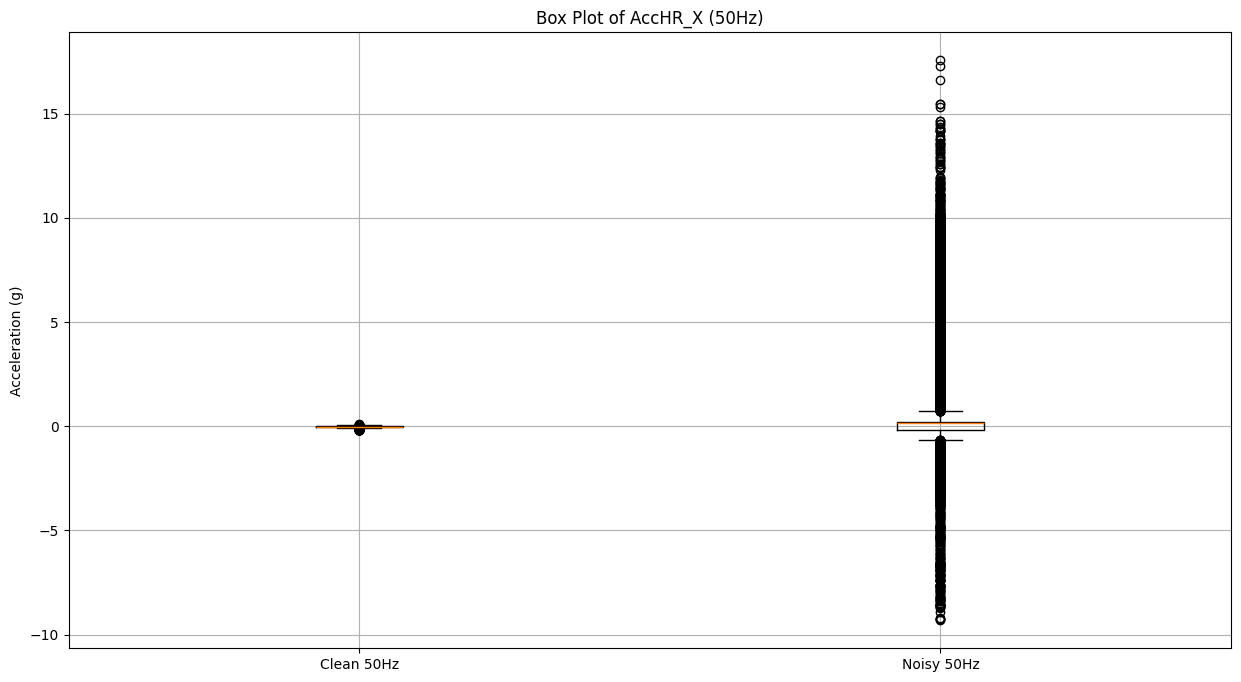

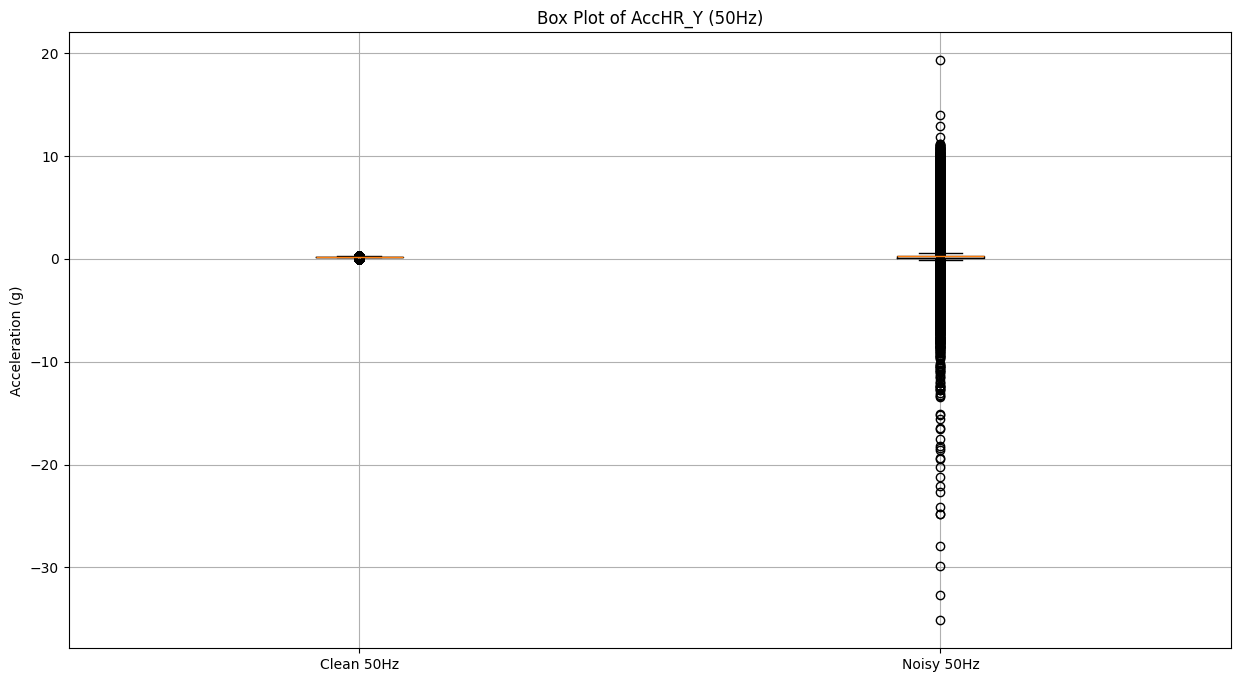

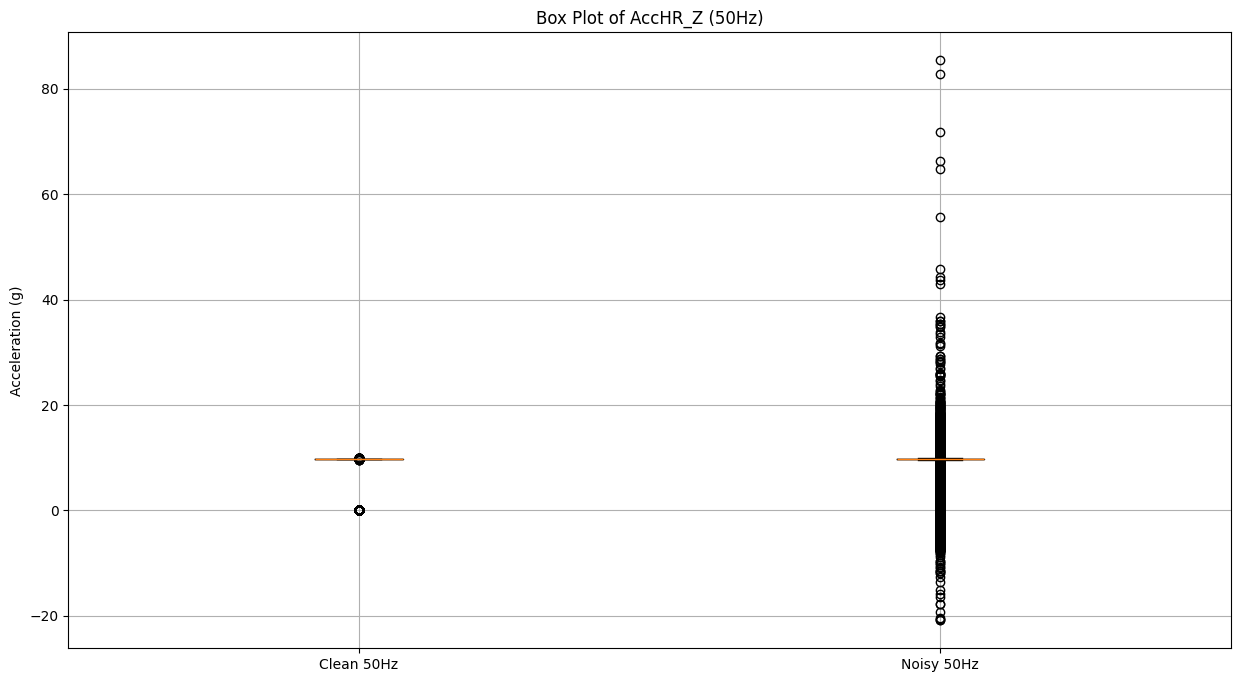

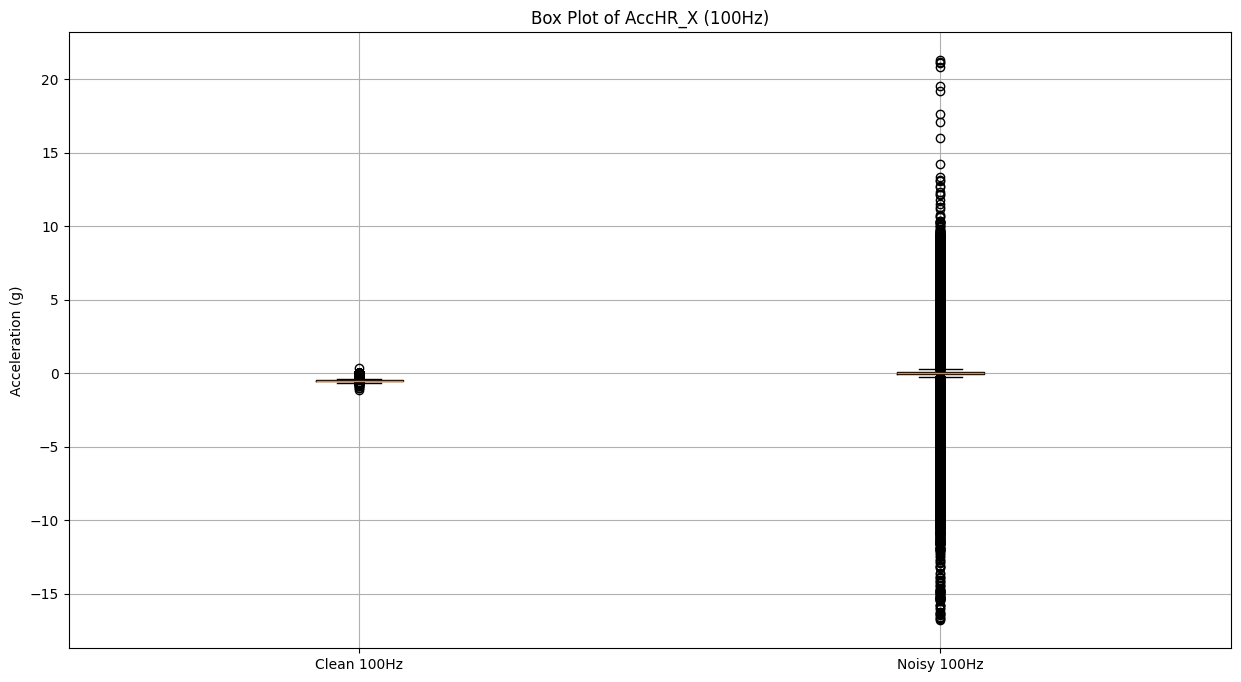

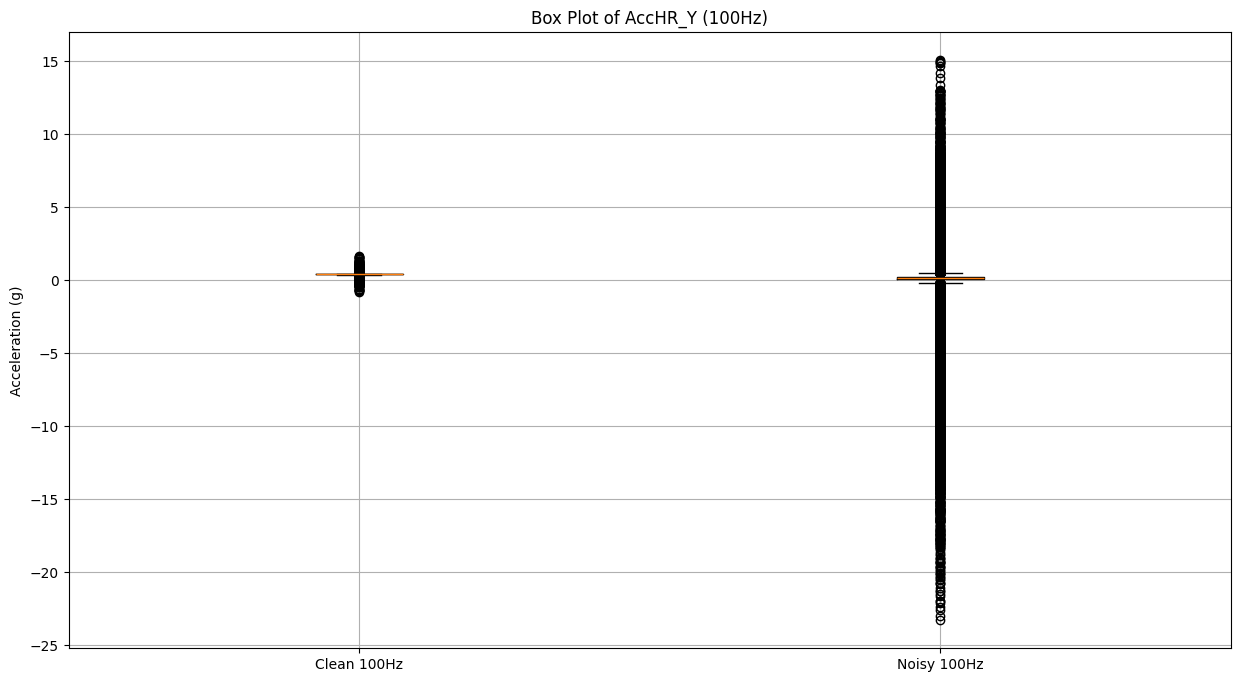

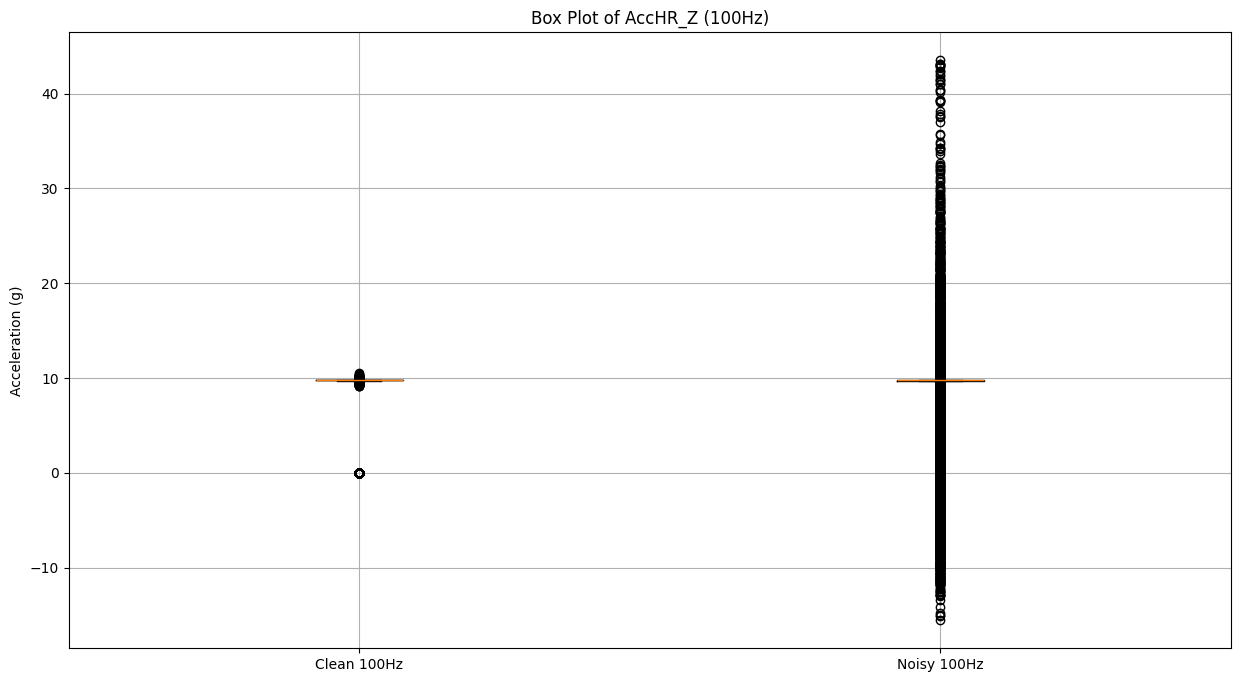

In [11]:
# --- Box Plots ---
# Prepare data for box plots (combining clean and noisy for each frequency)
data_25hz = pd.DataFrame({
    'Clean_AccHR_X': df_25hz['AccHR_X'], 'Clean_AccHR_Y': df_25hz['AccHR_Y'], 'Clean_AccHR_Z': df_25hz['AccHR_Z'],
    'Noisy_AccHR_X': df_noise_25hz['AccHR_X'], 'Noisy_AccHR_Y': df_noise_25hz['AccHR_Y'], 'Noisy_AccHR_Z': df_noise_25hz['AccHR_Z']
})

data_50hz = pd.DataFrame({
    'Clean_AccHR_X': df_50hz['AccHR_X'], 'Clean_AccHR_Y': df_50hz['AccHR_Y'], 'Clean_AccHR_Z': df_50hz['AccHR_Z'],
    'Noisy_AccHR_X': df_noise_50hz['AccHR_X'], 'Noisy_AccHR_Y': df_noise_50hz['AccHR_Y'], 'Noisy_AccHR_Z': df_noise_50hz['AccHR_Z']
})

data_100hz = pd.DataFrame({
    'Clean_AccHR_X': df_100hz['AccHR_X'], 'Clean_AccHR_Y': df_100hz['AccHR_Y'], 'Clean_AccHR_Z': df_100hz['AccHR_Z'],
    'Noisy_AccHR_X': df_noise_100hz['AccHR_X'], 'Noisy_AccHR_Y': df_noise_100hz['AccHR_Y'], 'Noisy_AccHR_Z': df_noise_100hz['AccHR_Z']
})

# Plot box plots for 25Hz data
plt.figure(figsize=(15, 8))
plt.boxplot([data_25hz['Clean_AccHR_X'].dropna(), data_25hz['Noisy_AccHR_X'].dropna()], labels=['Clean 25Hz', 'Noisy 25Hz'])
plt.title('Box Plot of AccHR_X (25Hz)')
plt.ylabel('Acceleration (g)')
plt.grid(True)

plt.figure(figsize=(15, 8))
plt.boxplot([data_25hz['Clean_AccHR_Y'].dropna(), data_25hz['Noisy_AccHR_Y'].dropna()], labels=['Clean 25Hz', 'Noisy 25Hz'])
plt.title('Box Plot of AccHR_Y (25Hz)')
plt.ylabel('Acceleration (g)')
plt.grid(True)

plt.figure(figsize=(15, 8))
plt.boxplot([data_25hz['Clean_AccHR_Z'].dropna(), data_25hz['Noisy_AccHR_Z'].dropna()], labels=['Clean 25Hz', 'Noisy 25Hz'])
plt.title('Box Plot of AccHR_Z (25Hz)')
plt.ylabel('Acceleration (g)')
plt.grid(True)

# Plot box plots for 50Hz data
plt.figure(figsize=(15, 8))
plt.boxplot([data_50hz['Clean_AccHR_X'].dropna(), data_50hz['Noisy_AccHR_X'].dropna()], labels=['Clean 50Hz', 'Noisy 50Hz'])
plt.title('Box Plot of AccHR_X (50Hz)')
plt.ylabel('Acceleration (g)')
plt.grid(True)

plt.figure(figsize=(15, 8))
plt.boxplot([data_50hz['Clean_AccHR_Y'].dropna(), data_50hz['Noisy_AccHR_Y'].dropna()], labels=['Clean 50Hz', 'Noisy 50Hz'])
plt.title('Box Plot of AccHR_Y (50Hz)')
plt.ylabel('Acceleration (g)')
plt.grid(True)

plt.figure(figsize=(15, 8))
plt.boxplot([data_50hz['Clean_AccHR_Z'].dropna(), data_50hz['Noisy_AccHR_Z'].dropna()], labels=['Clean 50Hz', 'Noisy 50Hz'])
plt.title('Box Plot of AccHR_Z (50Hz)')
plt.ylabel('Acceleration (g)')
plt.grid(True)

# Plot box plots for 100Hz data
plt.figure(figsize=(15, 8))
plt.boxplot([data_100hz['Clean_AccHR_X'].dropna(), data_100hz['Noisy_AccHR_X'].dropna()], labels=['Clean 100Hz', 'Noisy 100Hz'])
plt.title('Box Plot of AccHR_X (100Hz)')
plt.ylabel('Acceleration (g)')
plt.grid(True)

plt.figure(figsize=(15, 8))
plt.boxplot([data_100hz['Clean_AccHR_Y'].dropna(), data_100hz['Noisy_AccHR_Y'].dropna()], labels=['Clean 100Hz', 'Noisy 100Hz'])
plt.title('Box Plot of AccHR_Y (100Hz)')
plt.ylabel('Acceleration (g)')
plt.grid(True)

plt.figure(figsize=(15, 8))
plt.boxplot([data_100hz['Clean_AccHR_Z'].dropna(), data_100hz['Noisy_AccHR_Z'].dropna()], labels=['Clean 100Hz', 'Noisy 100Hz'])
plt.title('Box Plot of AccHR_Z (100Hz)')
plt.ylabel('Acceleration (g)')
plt.grid(True)


**Create plots for Temperature vs SampleTimeFine for each dataset**

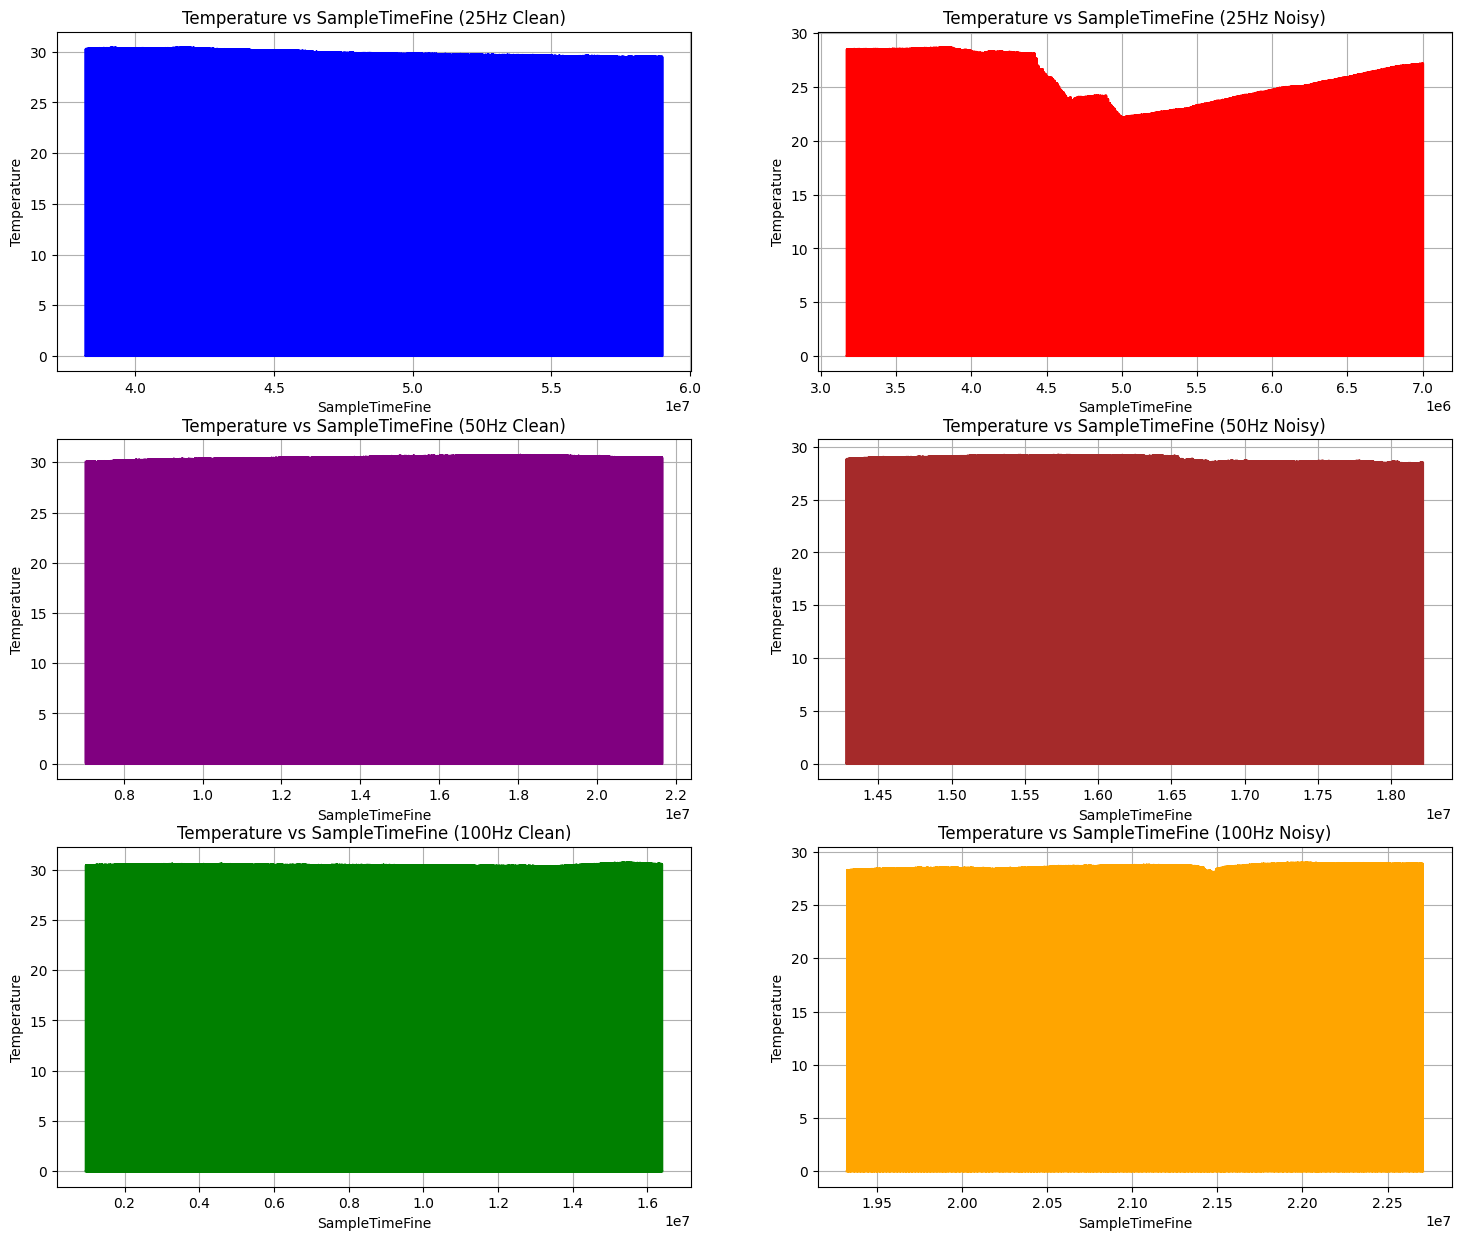

In [8]:
plt.figure(figsize=(18, 15))

# Plot for 25hz.csv
plt.subplot(3, 2, 1)
plt.plot(df_25hz['SampleTimeFine'], df_25hz['Temperature'], color='blue')
plt.title('Temperature vs SampleTimeFine (25Hz Clean)')
plt.xlabel('SampleTimeFine')
plt.ylabel('Temperature')
plt.grid(True)

# Plot for Noise_25HZ.csv
plt.subplot(3, 2, 2)
plt.plot(df_noise_25hz['SampleTimeFine'], df_noise_25hz['Temperature'], color='red')
plt.title('Temperature vs SampleTimeFine (25Hz Noisy)')
plt.xlabel('SampleTimeFine')
plt.ylabel('Temperature')
plt.grid(True)

# Plot for 50hz.csv
plt.subplot(3, 2, 3)
plt.plot(df_50hz['SampleTimeFine'], df_50hz['Temperature'], color='purple')
plt.title('Temperature vs SampleTimeFine (50Hz Clean)')
plt.xlabel('SampleTimeFine')
plt.ylabel('Temperature')
plt.grid(True)

# Plot for Noise_50hz.csv
plt.subplot(3, 2, 4)
plt.plot(df_noise_50hz['SampleTimeFine'], df_noise_50hz['Temperature'], color='brown')
plt.title('Temperature vs SampleTimeFine (50Hz Noisy)')
plt.xlabel('SampleTimeFine')
plt.ylabel('Temperature')
plt.grid(True)


# Plot for 100hz.csv
plt.subplot(3, 2, 5)
plt.plot(df_100hz['SampleTimeFine'], df_100hz['Temperature'], color='green')
plt.title('Temperature vs SampleTimeFine (100Hz Clean)')
plt.xlabel('SampleTimeFine')
plt.ylabel('Temperature')
plt.grid(True)

# Plot for Noise_100hz.csv
plt.subplot(3, 2, 6)
plt.plot(df_noise_100hz['SampleTimeFine'], df_noise_100hz['Temperature'], color='orange')
plt.title('Temperature vs SampleTimeFine (100Hz Noisy)')
plt.xlabel('SampleTimeFine')
plt.ylabel('Temperature')
plt.grid(True)